# Project Portofolio Digital Marketing Campaign
by Azka Bayu \
link data : https://www.kaggle.com/datasets/arpit2712/digital-marketing-company/data



# Import Package


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.width', 500)


# Import Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Digital Marketing Company/data.csv')
# df.head(10)

# Data Preperation

## Check Dtype

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           8000 non-null   int64  
 1   Age                  8000 non-null   int64  
 2   Gender               8000 non-null   object 
 3   Income               8000 non-null   int64  
 4   CampaignChannel      8000 non-null   object 
 5   CampaignType         8000 non-null   object 
 6   AdSpend              8000 non-null   float64
 7   ClickThroughRate     8000 non-null   float64
 8   ConversionRate       8000 non-null   float64
 9   WebsiteVisits        8000 non-null   int64  
 10  PagesPerVisit        8000 non-null   float64
 11  TimeOnSite           8000 non-null   float64
 12  SocialShares         8000 non-null   int64  
 13  EmailOpens           8000 non-null   int64  
 14  EmailClicks          8000 non-null   int64  
 15  PreviousPurchases    8000 non-null   i

## Check Values

In [ ]:
for dtype, col in list(zip(df.dtypes, df.columns)):
  if dtype == 'int64' or dtype == 'float64':
    print(col, dtype)
    print(df[col].min(), df[col].max())
  else:
    print(col, dtype)
    print(df[col].unique())
  print()

CustomerID int64
8000 15999

Age int64
18 69

Gender object
['Female' 'Male']

Income int64
20014 149986

CampaignChannel object
['Social Media' 'Email' 'PPC' 'Referral' 'SEO']

CampaignType object
['Awareness' 'Retention' 'Conversion' 'Consideration']

AdSpend float64
100.0548131 9997.914781

ClickThroughRate float64
0.010004854 0.299968264

ConversionRate float64
0.010017783 0.199994708

WebsiteVisits int64
0 49

PagesPerVisit float64
1.000427851 9.999055371

TimeOnSite float64
0.501669084 14.99531141

SocialShares int64
0 99

EmailOpens int64
0 19

EmailClicks int64
0 9

PreviousPurchases int64
0 9

LoyaltyPoints int64
0 4999

AdvertisingPlatform object
['IsConfid']

AdvertisingTool object
['ToolConfid']

Conversion int64
0 1



## Check Duplicated

In [ ]:
df[col].duplicated().sum()

7998

In [ ]:
df['AdvertisingPlatform'].duplicated().sum()

7999

In [ ]:
df['AdvertisingTool'].duplicated().sum()

7999

## Drop Colomn
drop column 'AdvertisingPlatform' and 'AdvertisingTool' becuase the values in this column is same in all rows, so we assums every rows have a same values from that column

In [4]:
columndrop_list = df[['AdvertisingPlatform', 'AdvertisingTool']]
df.drop(columndrop_list, axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         8000 non-null   int64  
 1   Age                8000 non-null   int64  
 2   Gender             8000 non-null   object 
 3   Income             8000 non-null   int64  
 4   CampaignChannel    8000 non-null   object 
 5   CampaignType       8000 non-null   object 
 6   AdSpend            8000 non-null   float64
 7   ClickThroughRate   8000 non-null   float64
 8   ConversionRate     8000 non-null   float64
 9   WebsiteVisits      8000 non-null   int64  
 10  PagesPerVisit      8000 non-null   float64
 11  TimeOnSite         8000 non-null   float64
 12  SocialShares       8000 non-null   int64  
 13  EmailOpens         8000 non-null   int64  
 14  EmailClicks        8000 non-null   int64  
 15  PreviousPurchases  8000 non-null   int64  
 16  LoyaltyPoints      8000 

In [ ]:
df.head(10)

,CustomerID,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,Conversion
0,8000,56,Female,136912,Social Media,Awareness,6497.87,0.04,0.09,0,2.40,7.40,19,6,9,4,688,1
1,8001,69,Male,41760,Email,Retention,3898.67,0.16,0.18,42,2.92,5.35,5,2,7,2,3459,1
2,8002,46,Female,88456,PPC,Awareness,1546.43,0.28,0.08,2,8.22,13.79,0,11,2,8,2337,1
3,8003,32,Female,44085,PPC,Conversion,539.53,0.14,0.09,47,4.54,14.69,89,2,2,0,2463,1
4,8004,60,Female,83964,PPC,Conversion,1678.04,0.25,0.11,0,2.05,13.99,6,6,6,8,4345,1
5,8005,25,Female,42925,Social Media,Awareness,9579.39,0.15,0.16,6,2.13,7.75,95,5,8,0,3316,1
6,8006,38,Female,25615,Referral,Awareness,7302.90,0.04,0.06,42,1.75,10.70,54,14,3,6,930,1
7,8007,56,Female,57083,Social Media,Conversion,5324.28,0.05,0.19,48,2.63,2.99,96,9,3,0,2983,1
8,8008,36,Female,140788,Email,Retention,9421.25,0.02,0.11,13,5.47,14.29,73,4,8,5,460,1
9,8009,40,Male,130764,Social Media,Awareness,6229.19,0.07,0.17,22,1.14,4.61,14,8,4,8,3789,1


## Check Missing Values

In [5]:
df.isna().sum() #missing value check

,0
CustomerID,0
Age,0
Gender,0
Income,0
CampaignChannel,0
CampaignType,0
AdSpend,0
ClickThroughRate,0
ConversionRate,0
WebsiteVisits,0


# Data Visualiation

## Campaign Type Group By Gender

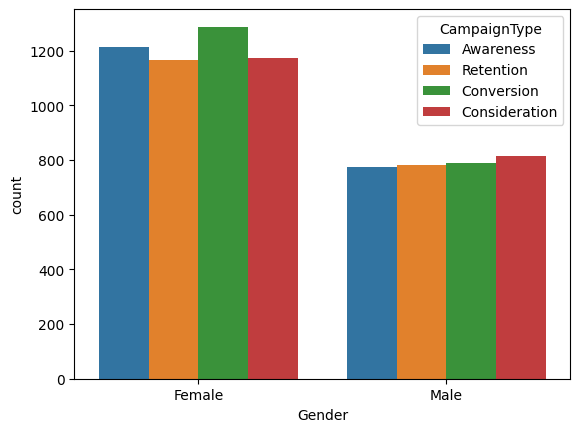

In [ ]:
sns.countplot(data=df, x='Gender', hue='CampaignType')
plt.show()

**Insight** \
Based on the visualization data above, it can be concluded that the marketing program for Female is greater than that for Male. This means that the company's marketing strategy is more targeted at the female gender than the male.

## AdSpend Total Group By Campaign Type

In [25]:
sum_campaign=df.groupby('CampaignType').agg({'AdSpend':'sum'})
sum_campaign

,AdSpend
CampaignType,
Awareness,10077845.83
Consideration,9861273.67
Conversion,10300076.98
Retention,9768362.16


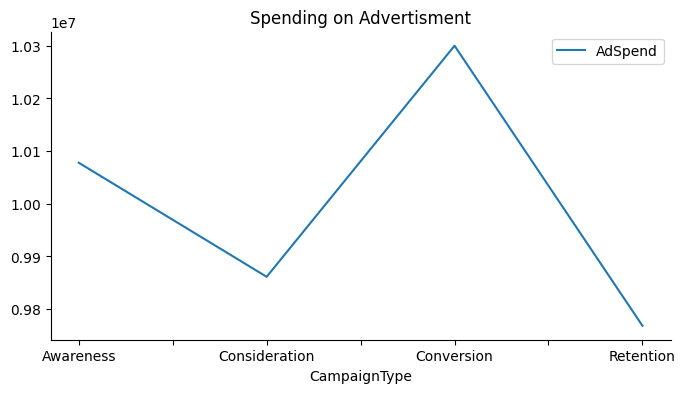

In [29]:
# adcamptype=sum_campaign['AdSpend'].plot(kind='line', figsize=(8, 4), title='AdSpend')

ax = sum_campaign.plot(kind='line', figsize=(8, 4), title='Spending on Advertisment')
plt.gca().spines[['top', 'right']].set_visible(False)

**Insight** \
The largest company budget is carried out in the marketing conversion phase. Companies focus on converting the leads they have to sales. It can be concluded that the company is assumed to have good leads data (hot leads and cold leads).

In [ ]:
conv_rate=df.groupby('Conversion').agg({'Conversion':'count'})
total = conv_rate['Conversion'].sum()
conv_rate['Conversion'] = conv_rate['Conversion']/total*100
conv_rate

,Conversion
Conversion,
0,12.35
1,87.65


## Convertion Rate Group By Gender

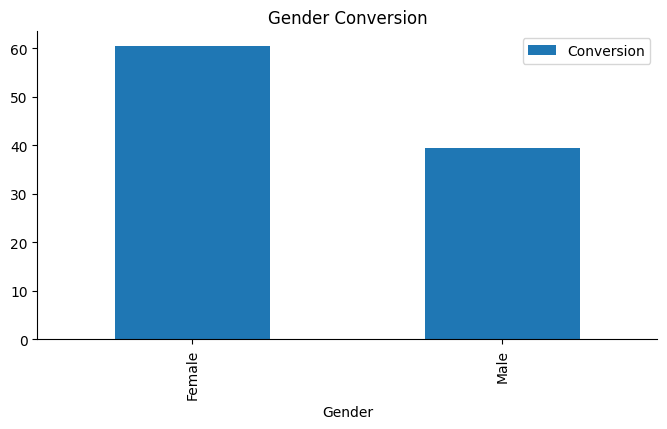

In [31]:
genderconv = df.groupby('Gender').agg({'Conversion':'sum'})
totalconv=genderconv['Conversion'].sum()
genderconv['Conversion'] = genderconv['Conversion']/totalconv*100

ax = genderconv.plot(kind='bar', figsize=(8, 4), title='Gender Conversion')
plt.gca().spines[['top', 'right']].set_visible(False)

**Insight**

The insight that can be taken is that Male's conversion rate is much lower than Female's. It is necessary to evaluate the company's marketing strategy if it wants to maximize potential leads on Male

## Interaction Customer with Media Channel Group By Gender

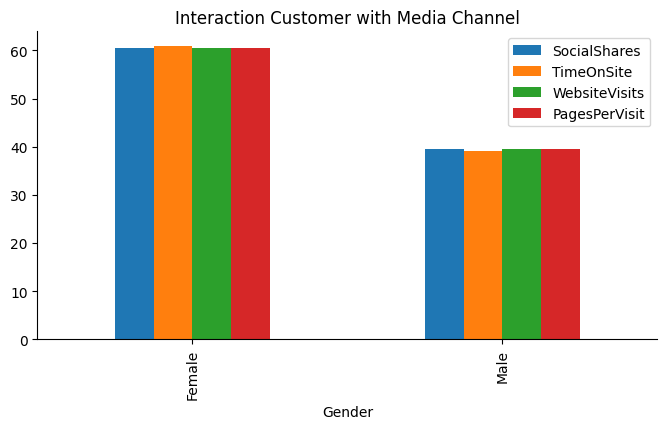

In [34]:
col = ['SocialShares', 'TimeOnSite', 'WebsiteVisits', 'PagesPerVisit']
genderexp = df.groupby('Gender').agg({'SocialShares':'sum', 'TimeOnSite':'sum', 'WebsiteVisits':'sum',
                                      'PagesPerVisit':'sum'})

total = genderexp[col].sum()
genderexp[col] = genderexp[col]/total*100
# genderexp

ax = genderexp.plot(kind='bar', figsize=(8, 4), title='Interaction Customer with Media Channel')
plt.gca().spines[['top', 'right']].set_visible(False)

**Insight** \
In the data visualization that has been done previously, it can be seen that Male has a low conversion. Then what is the cause? \
According to the bar chart data above, it can be seen that Male has relatively low interaction on the company's media channel compared to Female. The company can improve content and other marketing strategies that are relevant to Male.

## Loyalty Points Group By Gender

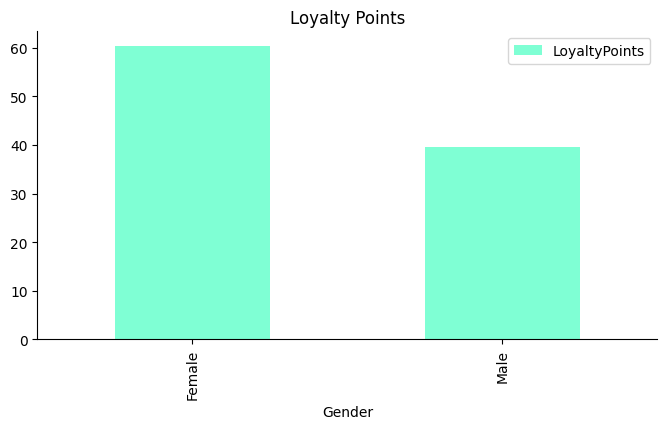

In [36]:
genderloyaltypoint = df.groupby('Gender').agg({'LoyaltyPoints':'sum'})
# print(genderloyaltypoint)

totalloyalty=genderloyaltypoint['LoyaltyPoints'].sum()
genderloyaltypoint['LoyaltyPoints'] = genderloyaltypoint['LoyaltyPoints']/totalloyalty*100
# print(genderloyaltypoint)
colors = ['#7FFFD4', '#000000']
ax = genderloyaltypoint.plot(kind='bar', figsize=(8, 4), title='Loyalty Points')
plt.gca().spines[['top', 'right']].set_visible(False)

**Insight**

The most fundamental insight into the company's marketing strategy is that male loyalty is much lower than female. The conclusion is that it is necessary to formulate a marketing strategy, especially for males, to maximize potential leads and increase repeat orders/purchases of the company's products.